## Kaggle Competition - House Prices Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%config Completer.use_jedi = False

In [3]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

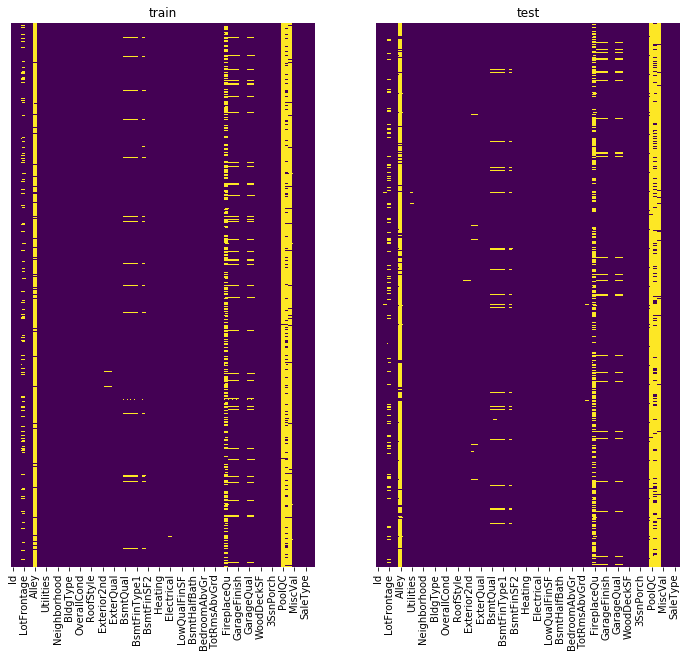

In [5]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, ax=ax1,cmap = 'viridis')
sns.heatmap(df_test.isnull(), yticklabels=False, cbar= False, ax=ax2,cmap = 'viridis')
ax1.title.set_text('train')
ax2.title.set_text('test')


In [6]:
print ('Missing values in Train dataset\n')
print(df.isnull().sum()[df.isnull().sum()>0])
print ( '\nMissing values in Test dataset\n')
print(df_test.isnull().sum()[df_test.isnull().sum()>0])

Missing values in Train dataset

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Missing values in Test dataset

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      

In [7]:
df.shape

(1460, 81)

In [8]:
# first feature 'LotFrontage'

# in train DS
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

# in test DS
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())



In [9]:
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])


In [10]:
# will be dropping feature which has more than 50% missing value

df.drop(columns=['Alley','PoolQC','Fence','MiscFeature'], inplace = True)

df_test.drop(columns=['Alley','PoolQC','Fence','MiscFeature'], inplace = True)

In [11]:
#updating null value with mode value
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])

df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])


In [12]:
df_test['MasVnrType'] = df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])


In [13]:
df_test['MasVnrType'] = df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])


In [14]:
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())


In [15]:

df_test['BsmtQual'] = df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])


In [16]:

df_test['BsmtCond'] = df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])


In [17]:


df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])


In [18]:
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])


In [19]:

df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])


In [20]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])


In [21]:

df_test['GarageType'] = df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])


In [22]:
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())


In [23]:
df_test['GarageFinish'] = df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])


In [24]:
df_test['GarageQual'] = df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])


In [25]:
df_test['GarageCond'] = df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])


In [26]:
df_test['Utilities'] = df_test['Utilities'].fillna(df_test['Utilities'].mode()[0])


In [27]:
df_test['Exterior1st'] = df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])


In [28]:
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])


In [29]:
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].median())


In [30]:
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].median())


In [31]:
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].median())


In [32]:
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].median())

df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].median())


In [33]:
df_test['KitchenQual'] = df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])


In [34]:
   
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean())


In [35]:

df_test['Functional'] = df_test['Functional'].fillna(df_test['Functional'].mode()[0])


In [36]:
df_test['GarageCars'] = df_test['GarageCars'].fillna(df_test['GarageCars'].mode()[0])


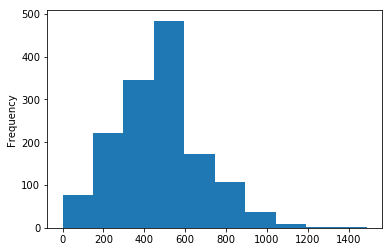

In [37]:
df_test.GarageArea.plot(kind='hist')

In [38]:
df_test['GarageArea'] = df_test['GarageArea'].fillna(df_test['GarageArea'].mean())


In [39]:
df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])


In [40]:
# ID column is also repeatitive, so can be removed from dataframe

df.drop(columns=['Id'], inplace=True)
df_test.drop(columns=['Id'], inplace=True)

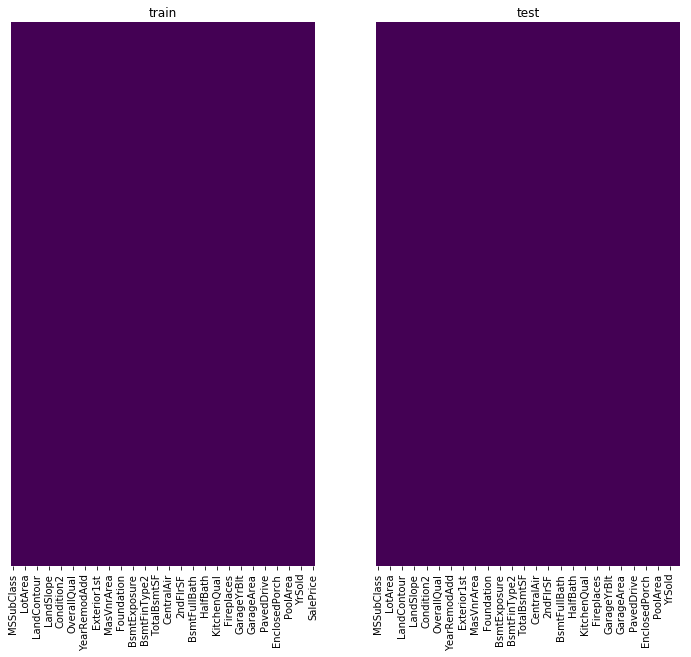

In [41]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, ax=ax1,cmap = 'viridis')
sns.heatmap(df_test.isnull(), yticklabels=False, cbar= False, ax=ax2,cmap = 'viridis')
ax1.title.set_text('train')
ax2.title.set_text('test')

## no null value exist now in both the dataset

In [42]:
df.shape, df_test.shape

((1460, 76), (1459, 75))

In [43]:
# Handling categorical features

In [44]:
# first find all categorical columns 
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [45]:
cat_col = df.dtypes[df.dtypes=='O'].index.values

In [46]:
len(cat_col)

39

In [47]:
df_main = df.copy()
df_test_main = df_test.copy()

In [48]:
df_main.shape, df_test_main.shape

((1460, 76), (1459, 75))

In [49]:
df_test.columns == df.columns[:-1]

# all the columns are alligned properly

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [50]:
# adding one column in the end 
df_test[df.columns[-1]] = np.nan

In [51]:
df_final = pd.concat([df, df_test], axis = 0)
df_final.reset_index(inplace=True,drop=True)

In [52]:
df_final.shape

(2919, 76)

In [53]:
# As we have lot of categorical features, will make a function to 
# handle all categorical features.

In [54]:
def categories_to_dummies(cat_col,df_final):

    # This function helps in converting categorical variables into onehot coding
    # cat_col : it is a list/array of the all categorical variables in dataframe
    # df_final : it is the dataframe
    
    for col in cat_col:
        #print(col)
        df_dummy = pd.get_dummies(df_final[col],drop_first=True,prefix=col)
        df_final.drop(col, axis = 1, inplace = True)
        
        df_final = pd.concat([df_final,df_dummy],axis=1)
        
    return df_final
        

In [55]:
df_final=categories_to_dummies(cat_col=cat_col,df_final=df_final)

In [56]:
df_final.shape

(2919, 237)

In [57]:
# no duplicate columns
df_final.columns.duplicated().sum()

0

In [58]:
suffix = [i.split('_')[1] for i in df_final.columns.values if i.count('_')>0]

In [59]:
repeat_col =list(set([x for x in suffix if suffix.count(x) > 1]))


In [60]:
col_as = [col for col in df_final.columns.values if col.count('_')>0 ]
duplicate = [col for col in col_as if  col.split('_')[1] in repeat_col]

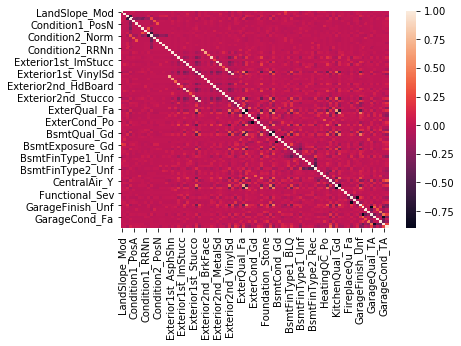

In [61]:
sns.heatmap(df_final[duplicate].corr())

In [62]:
df_final[['Functional_Mod','LandSlope_Mod']].corr()

,Functional_Mod,LandSlope_Mod
Functional_Mod,1.000000,0.007792
LandSlope_Mod,0.007792,1.000000


In [63]:
# all columns are not corelated to each other, no multi colinerity. 
# no need to remove any column

In [64]:
df_final.shape

(2919, 237)

In [65]:
# dependent variable in the end

col_list = list(df_final.columns.values)

In [66]:
# finding index of a string in a list
col_list.remove('SalePrice')

In [67]:
len(col_list)

236

In [68]:
# append to add it in the end
col_list.append('SalePrice')

In [69]:
len(col_list)

237

In [70]:
df_final= df_final[col_list]

In [71]:
df_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,1,0,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,1,0,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,1,0,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,0,0,0,0,0,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,1,0,250000.0


In [72]:
df_train = df_final[:1460]
df_test = df_final[1460:]



In [73]:
df_test.drop(['SalePrice'], axis = 1, inplace=True)

C:\Users\Mein Pc\.conda\envs\nlp_course\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [74]:
X = df_train.drop(['SalePrice'], axis=1)
y = df_train['SalePrice']

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
# try for multiple model

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [78]:


from  datetime import datetime
start_time = int(datetime.now().strftime('%H%M%S'))

models = []

models.append(('XGB',XGBRegressor()))
models.append(('ADAboost',AdaBoostRegressor()))
models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('LinearRegression', LinearRegression()))

import time 


results = []
names = []
best_model = ''
r2 = 0 

print(f'Name of the model                R2 score                        MSE              Time taken')

for name, model in models:
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    res = r2_score(y_test, y_pred)
    
    if res > r2:
        best_model = name
        r2 = res
        
    mse = mean_squared_error(y_test, y_pred)
    results.append((name,res,mse))
    
    
    current_time = int(datetime.now().strftime('%H%M%S'))
    time_taken = current_time - start_time
    start_time = current_time 
    
    print( f' {name:<30} {res:<30} {mse:<25} {time_taken:<15}' )
    

print( f'And the best model by r2score is : { best_model}')    

Name of the model                R2 score                        MSE              Time taken
 XGB                            0.8440604712149592             1144813109.3974016        41             
 ADAboost                       0.8267220478562687             1272101260.8491914        1              
 DecisionTree                   0.6771303054961475             2370312785.8278008        0              
 RandomForest                   0.8665764183321902             979514729.7553983         1              
 LinearRegression               0.7720663312164007             1673350266.796123         0              
And the best model by r2score is : RandomForest


In [79]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8613875444245268

In [80]:
df_pred = model.predict(df_test)

In [81]:
df_pred

array([128511.  , 152165.  , 186596.6 , ..., 155314.5 , 117533.5 ,
       229288.05])

In [127]:
# preparing for sample submission

df_sample = pd.read_csv('sample_submission.csv')

In [121]:
df_sample.shape

(1459, 2)

In [122]:
df_sample['SalePrice_pred'] = pd.Series(df_pred)

In [123]:
df_sample=df_sample[['Id','SalePrice_pred']].rename(columns = {'SalePrice_pred':'SalePrice'})

In [124]:
df_sample.to_csv('sample_submission_final.csv', index= False) # this will overwrite the old file

In [126]:
pd.read_csv('sample_submission_final.csv').head()

,Id,SalePrice
0,1461,128511.00
1,1462,152165.00
2,1463,186596.60
3,1464,186784.35
4,1465,201672.51
